In [8]:
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels as sm
import statsmodels.api as sma
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro, kstest, ttest_ind, mannwhitneyu, fisher_exact, chi2_contingency, kruskal, wilcoxon, ttest_rel
from statsmodels.stats.contingency_tables import mcnemar, cochrans_q
from pandas.api.types import CategoricalDtype

pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)

In [17]:
df = pd.read_excel('C:/Users/lizag/OneDrive/Рабочий стол/Управление талантами/Финальный проект/DBTC2.xlsx', sheet_name = 'Answers')


In [18]:
df = df[df['Talents'] == 1].drop(columns = 'Talents')

## Описательный анализ

In [86]:
df1 = pd.read_excel('C:/Users/lizag/OneDrive/Рабочий стол/Управление талантами/Финальный проект/DBTC3.xlsx', sheet_name = 'Answers')

([<matplotlib.patches.Wedge at 0x22649a1ed48>,
 [Text(-1.095307584980848, 0.10149529192737142, 'Yes'),
  Text(1.095307576072086, -0.10149538806808751, 'No')],
 [Text(-0.5974405008986443, 0.05536106832402077, '97.1%'),
  Text(0.5974404960393196, -0.05536112076441137, '2.9%')])

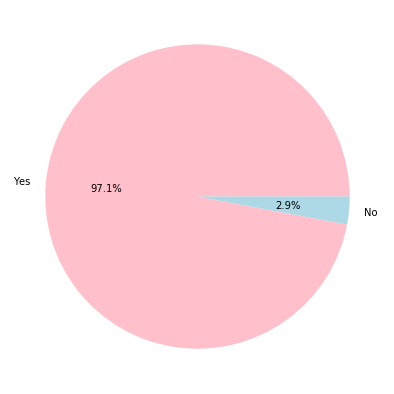

In [87]:
labels = df1.IllrecommendcompanyAsEmployer.value_counts().index
colors = ["pink","lightblue"]
sizes = df1.IllrecommendcompanyAsEmployer.value_counts().values
plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%")

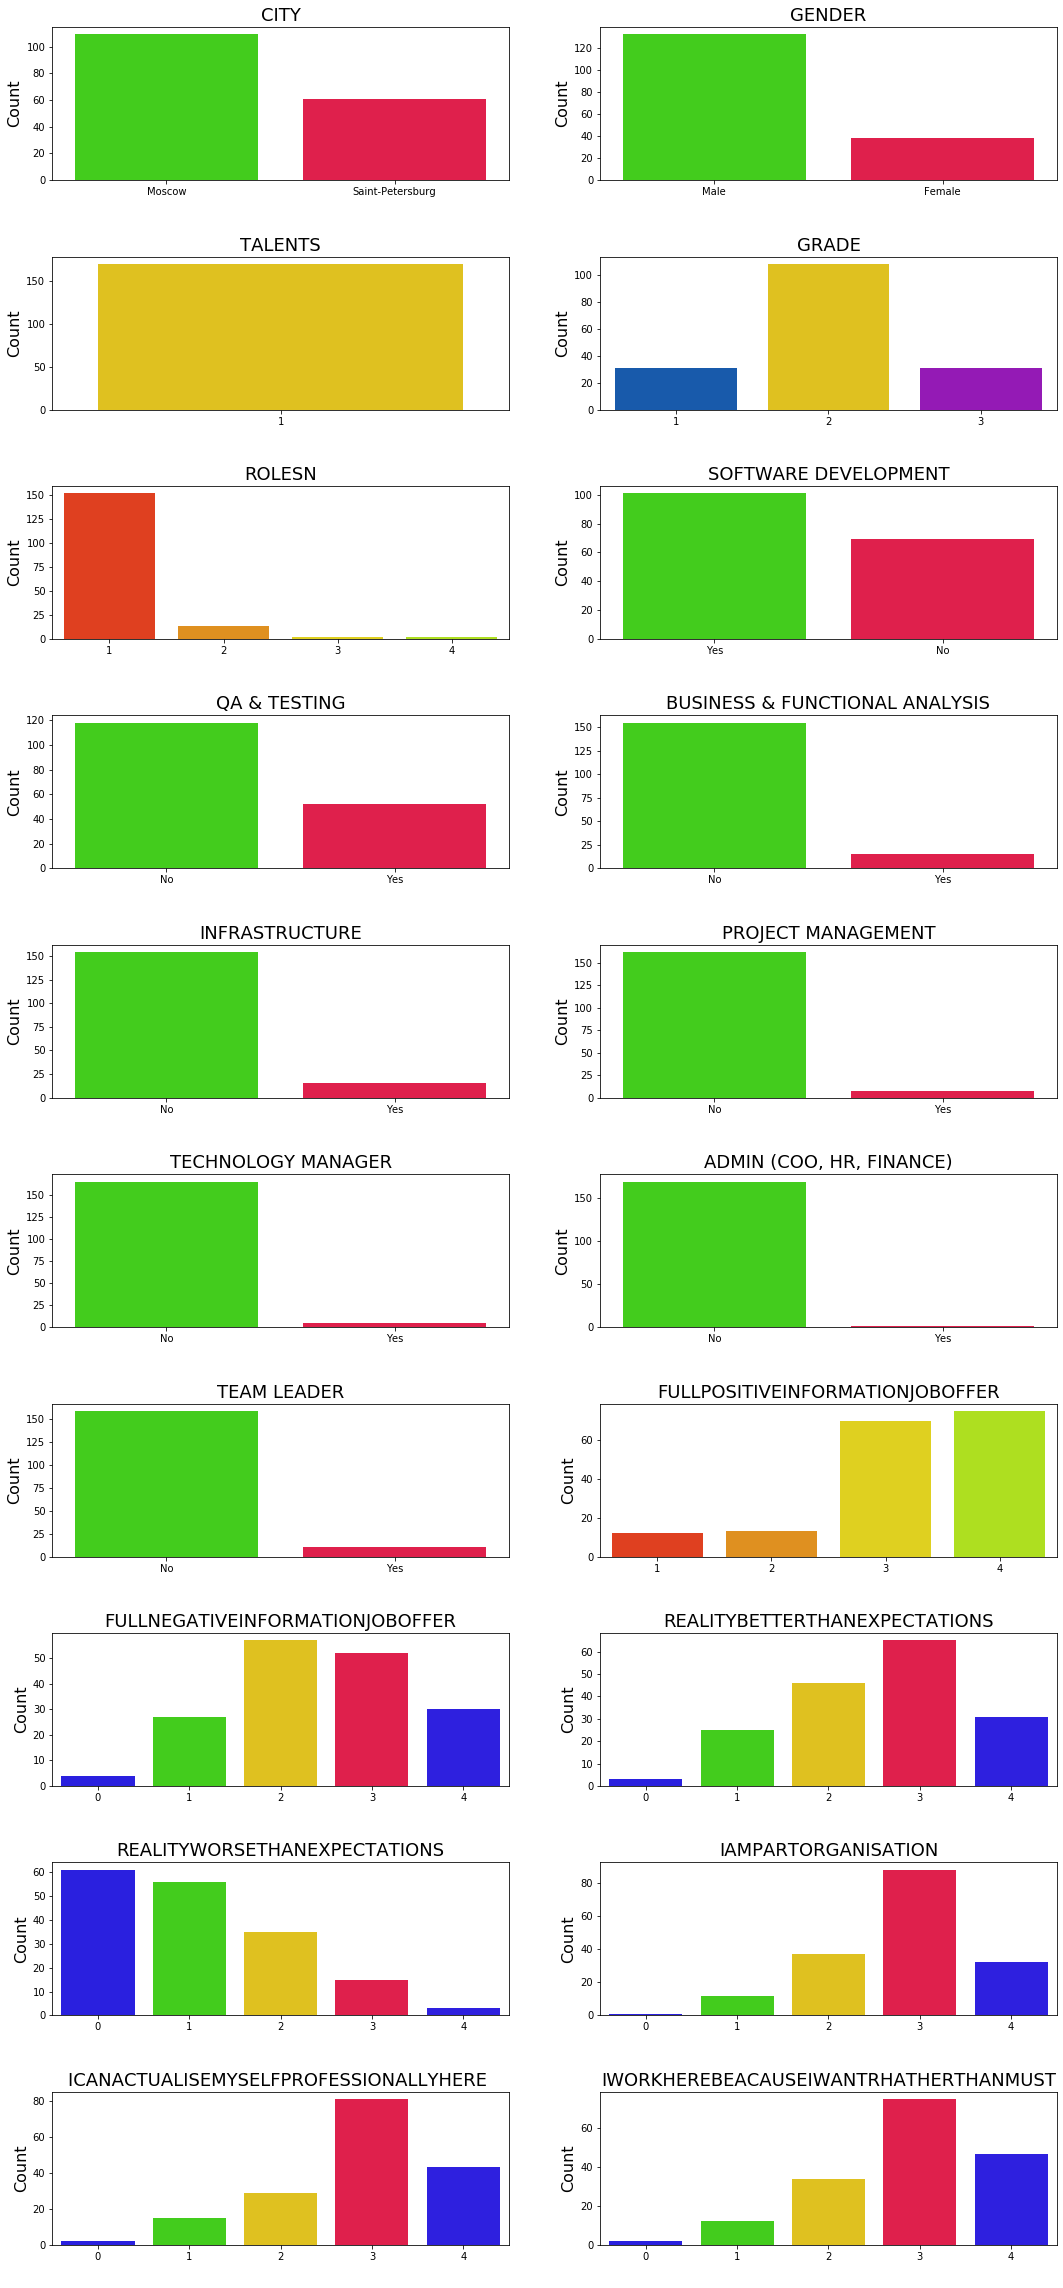

In [92]:
fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(18,35))
fig.subplots_adjust(hspace=0.5, bottom=0)

for ax, catplot in zip(axes.flatten(), df1):
        sns.countplot(x=catplot, data=df1, ax=ax, palette='prism')
        ax.set_title(catplot.upper(), fontsize=18)
        ax.set_ylabel('Count', fontsize=16)
        ax.set_xlabel(' ', fontsize=15)

###  Создание дамми-переменных

In [49]:
"""
Преобразование в dummy - переменные с сохранением NA, если они присутствуют. 
"""

def dummy_serie(df, col):
    tab = pd.get_dummies(df[col], prefix = col)
    tab.loc[df[col].isnull(), tab.columns.str.startswith(str(col))] = np.nan
    return(tab)

def dummification(df, cat_vars):
    data = df[cat_vars]
    tab = pd.DataFrame()
    for col in data:
        tab = pd.concat([dummy_serie(df, col), tab], axis = 1)
    
    tab = tab[tab.columns[::-1]]
    df =df.drop(columns = cat_vars)
    df = pd.concat([df, tab], axis = 1)
        
    return(df)

In [58]:
cat_vars = ['City', 'Gender']
df = dummification(df, cat_vars)
df = df.drop(columns = 'Gender_2')
df = df.drop(columns = 'City_2.0')


### Сравненительный анализ

* FullNegativeInformationJobOffer - таланты лучше осведомлены об отрицательных сторонах оффера
* IworkherebeacauseIWantRhatherthanMust - таланты в большей степени работают по желанию, чем по необходимости (эта, кстати, связана с возрастом - чем он выше, тем больше необходимости в работе нежели желания)
* ExistsOptionsProjectTeamChange - у талантов возможность сменить проект/ команду меньше
* ExistsFullCycleDevInfluence - у талантов возможность влиять на полный цикл разработки ПО меньше
* ExistsDiversityAndInclusion - таланты в целом ниже оценивают приверженность организации принципам социального разнообразия (diversity and inclusion)
* ImportantWorkWithExperiencedPofessionals - для талантов критически важно работать с опытными и профессиональными людьми (почти все отметили 4, у не талантов есть разброс оценок)
* ExistsTaskVariety - у талантов разнообразие текущих рабочих задач меньше, чем у не талантов. Это, возможно, связано ещё и с тем, что они только одну роль выполняют в отличие от не талантов
* ExistsTimelyRelevanCommuniOrg - таланты выше оценивать своевременность и достоверность коммуникации о том, что происходит в жизни организации

## Выводы по корреляциям

* ImportantFriendlyResponsiveColleagues ~ ImportantWorkInUnitedTeam 0,7
* ExistsFriendlyResponsiveColleagues ~ ExistsWorkInUnitedTeam 0,7
* ImportantRoleModelManagemer ~ ImportantInspirationalManager 0,7
* ExistsRoleModelManagemer ~ ExistsInspirationalManager 0,7


* Age ~ Grade 0,6
* IAmPartOrganisation ~ ICanActualiseMyselfProfessionallyHere 0,6
* ExistsProfExperiseIncrease ~ ExistsEnhanceMyJobMarketRelevance 0,6
* ExistsWorkInUnitedTeam ~ ExistsInspirationalManager 0,6
* ImportantDynamicEvironment ~ ExitstDynamicEvironment 0,6
* ExistsInspirationalManager ~ ExistsTimlyUnderstandableFeedBackManager 0,6
* ImportantTimlyUnderstandableFeedBackManager ~ ImportantJobImportanceColleaguesManagerAppec 0,6
* 

* ExistsTaskVariety ~ ExistsProfExperiseIncrease 0,5
* ExistsWorkWithExperiencedPofessionals ~ ExistsProfExperiseIncrease 0,5
* ICanActualiseMyselfProfessionallyHere ~ ExistsProfExperiseIncrease 0,5
* ExistsCareerLadderPromot ~ ExistsFullCycleDevInfluence 0,5
* ExistsCareerLadderPromot ~ ExistsEnhaceManagerialCompetenceDecisionMakInfuence 0,5
* ExistsCareerLadderPromot ~ ExistsJobImportanceColleaguesManagerAppec 0,5
* ExistsModernTechnologyUse ~ ExistsInnovProjectParticipOptions 0,5
* ImportantBusinessTripANDNetworking ~ ImportantCanMoveOtherSubquarters
* ExistsProfessTrainingsDev ~ ExistsProfConferenceParticip
* ImportantFriendlyResponsiveColleagues ~ ImportantWorkWithExperiencedPofessionals
* ExistsFriendlyResponsiveColleagues ~ ExistsWorkWithExperiencedPofessionals
* ExistsFriendlyResponsiveColleagues ~ ExistsRoleModelManagemer
* ExistsFriendlyResponsiveColleagues ~ ExistsInspirationalManager
* ExistsFriendlyResponsiveColleagues ~ ExistsCorpCultureEnviron
и др. переменные, их очень-очень много


* ImportantSocialPackage ~ ImportantCompetitiveSalary 0,5


* ICanActualiseMyselfProfessionallyHere ~ RealityWorseThanExpectations -0,5
* ExistsRoleModelManagemer ~ RealityWorseThanExpectations -0,5
* ExistsCorpCultureEnviron ~ RealityWorseThanExpectations -0,4
* IAmPartOrganisation ~ RealityWorseThanExpectations -0,4
* IworkherebeacauseIWantRhatherthanMust ~ RealityWorseThanExpectations -0,4
* ExistsTaskVariety ~ RealityWorseThanExpectations -0,4
* ExistsProfExperiseIncrease ~ RealityWorseThanExpectations -0,4
* ExistsWorkWithExperiencedPofessionals ~ RealityWorseThanExpectations -0,4
* ExistsInspirationalManager ~ RealityWorseThanExpectations -0,4
* ExistsJobImportanceBusiGoalConnect ~ RealityWorseThanExpectations -0,4
* ExistsJobImportanceColleaguesManagerAppec ~ RealityWorseThanExpectations -0,4
* ExistsInnovProjectParticipOptions ~ RealityWorseThanExpectations -0,3
* ExistsCareerLadderPromot ~ RealityWorseThanExpectations -0,3
* ExistsFullCycleDevInfluence ~ RealityWorseThanExpectations -0,3
* ExistsFriendlyResponsiveColleagues ~ RealityWorseThanExpectations -0,3
* ExistsWorkInUnitedTeam ~ RealityWorseThanExpectations -0,3
* ExistsTimlyUnderstandableFeedBackManager ~ RealityWorseThanExpectations -0,3
* ExistsOpportinityToOfferAndRealIdeas ~ RealityWorseThanExpectations -0,3
* ExistsTimelyRelevanCommuniOrg  ~ RealityWorseThanExpectations -0,3
* ImportantWorkStableReliableCompany ~ RealityWorseThanExpectations -0,3
* EsistsComfWorkPlaceAndNesSoftware ~ RealityWorseThanExpectations -0,3
* `FullNegativeInformationJobOffer` ~ RealityWorseThanExpectations -0,3


* ExistsOfficeLocation вообще ни с чем не коррелирует

## Регрессии только по талантам

In [6]:
def regr_onedim(df, group, adjusted = False, signif_only = False, age_col = 1, sex_col = 1, save_tab = False):

    reg_data = df.drop(columns=group)
    y = df[[group]]
    logregr = pd.DataFrame()

    if adjusted == False:
        for col in reg_data.columns:
            v = reg_data[col].name
            logit_model=sma.GLM(y,sma.add_constant(reg_data[[col]]), family = sma.families.Binomial())
            result=logit_model.fit()
            params = np.exp(result.params)[1]
            conf0 = np.exp(result.conf_int())[0][1]
            conf1 = np.exp(result.conf_int())[1][1]
            p = result.pvalues[1]
            logregr = logregr.append({'Names': v, 'OR': '{0:.2f}'.format(params), 'lower': '{0:.2f}'.format(conf0), 'upper': '{0:.2f}'.format(conf1),'p_val': p}, ignore_index=True)
            
        logregr = logregr.reindex(columns=['Names', 'OR', 'lower', 'upper', 'p_val']) 

    else:
        for col in reg_data.columns:
            v = reg_data[col].name
            logit_model=sma.GLM(y,sma.add_constant(reg_data[[col, age_col, sex_col]]), family = sma.families.Binomial())
            result=logit_model.fit()
            params = round(np.exp(result.params)[1], 2)
            conf0 = round(np.exp(result.conf_int())[0][1],2)
            conf1 = round(np.exp(result.conf_int())[1][1],2)
            p = round(result.pvalues[1], 3)
            logregr = logregr.append({'Names': v, 'OR': '{0:.2f}'.format(params), 'lower': '{0:.2f}'.format(conf0), 'upper': '{0:.2f}'.format(conf1),'p_val': p}, ignore_index=True)
        
        logregr = logregr.reindex(columns=['Names', 'OR', 'lower', 'upper', 'p_val'])[(logregr['Names'] != age_col) & (logregr['Names'] != sex_col)]


    if signif_only == True:
        logregr = logregr[logregr['p_val'] < 0.05]
    else:
        pass

    if save_tab == True:
        return pd.DataFrame.to_excel(logregr, 'Одномерный регрессионный анализ.xlsx')
    else:
        return logregr

"""
regr_multi
"""
def regr_multi(df, group, lst, save_tab = False):
    logit_model=sma.GLM(df[group],sma.add_constant(df[lst]), family = sma.families.Binomial())
    result=logit_model.fit()
    params = round(np.exp(result.params)[1:],2)
    names = params.index
    conf0 = round(np.exp(result.conf_int())[1:][0],2)
    conf1 = round(np.exp(result.conf_int())[1:][1],2)
    p = round(result.pvalues[1:],3)
    multivar = pd.DataFrame({'Names': v, 'OR': params, 'lower': conf0, 'upper': conf1,'p_val': p})
    multivar.reset_index().iloc[:, 1:]

    if save_tab == True:
        return pd.DataFrame.to_excel(multivar, 'Многомерный регрессионный анализ.xlsx')
    else:
        return multivar

In [40]:
reg_data = df.drop(columns=['IllrecommendcompanyAsEmployer']).dropna()
y = df.drop(columns=[]).dropna()[['IllrecommendcompanyAsEmployer']]
logregr = pd.DataFrame()

for col in reg_data.columns:
    v = reg_data[col].name
    logit_model=sma.GLM(y, sma.add_constant(reg_data[[col]]), family = sma.families.Binomial())
    result=logit_model.fit()
    params = np.exp(result.params)[1]
    conf0 = np.exp(result.conf_int())[0][1]
    conf1 = np.exp(result.conf_int())[1][1]
    p = result.pvalues[1]
    logregr = logregr.append({'Names': v, 'OR': '{0:.2f}'.format(params), 'lower': '{0:.2f}'.format(conf0), 'upper': '{0:.2f}'.format(conf1),'p_val': p}, ignore_index=True)
            
logregr = logregr.reindex(columns=['Names', 'OR', 'lower', 'upper', 'p_val']) 
logregr = logregr[logregr['p_val'] < 0.05]
logregr

C:\Users\lizag\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
C:\Users\lizag\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


,Names,OR,lower,upper,p_val
8,Project Management,0.06,0.01,0.40,0.004201
13,ExistsTaskVariety,6.05,1.58,23.11,0.008518
14,ImportantProfExperiseIncrease,4.40,1.49,13.01,0.007471
15,ExistsProfExperiseIncrease,5.07,1.88,13.67,0.001341
17,ExistsCareerLadderPromot,12.90,2.65,62.80,0.001546
19,ExistsFullCycleDevInfluence,3.44,1.35,8.73,0.009470
21,ExistsModernTechnologyUse,4.11,1.50,11.23,0.005918
29,ExistsProfessTrainingsDev,2.73,1.19,6.23,0.017531
31,ExistsProfConferenceParticip,2.50,1.04,6.02,0.040931
33,ExistsOptionsProjectTeamChange,5.85,1.68,20.39,0.005526


In [122]:
lst = list(logregr[logregr['p_val'] < 0.05]['Names'])
lst = ['Project Management',
 'ExistsTaskVariety',
 'ImportantProfExperiseIncrease',
 'ExistsProfExperiseIncrease',
 'ExistsCareerLadderPromot',
 'ExistsFullCycleDevInfluence',
 'ExistsModernTechnologyUse',
 'ExistsProfessTrainingsDev',
 'ExistsProfConferenceParticip',
 'ExistsOptionsProjectTeamChange',
 'ExistsWorkInUnitedTeam',
 'ExistsCompetitiveSalary',
 'ExistsWorkLifeBalance',
 'RealityBetterThanExpectations',
 'RealityWorseThanExpectations',
 'IAmPartOrganisation',
 'ICanActualiseMyselfProfessionallyHere ',
 'IworkherebeacauseIWantRhatherthanMust',
 'IAmPartOrganisation_targ',
 'IworkherebeacauseIWantRhatherthanMust_targ',
 'FullNegativeInformationJobOffer_targ']

lst[13]

'ExistsWorkLifeBalance'

In [121]:
multi = regr_multi(df.dropna(), group = 'IllrecommendcompanyAsEmployer', lst = lst[:12], save_tab = False)
multi = multi[multi['p_val'] < 0.05].drop(columns = 'Names').sort_values('OR', ascending = False)
multi

,OR,lower,upper,p_val


## Создание таргетных переменных

Создание таргетных переменных с порогом по медиане

In [10]:
cat_list = ['RealityBetterThanExpectations', 'RealityWorseThanExpectations', 'IAmPartOrganisation', 'ICanActualiseMyselfProfessionallyHere ', 'IworkherebeacauseIWantRhatherthanMust']

df['RealityBetterThanExpectations_targ'] = (df['RealityBetterThanExpectations'] >= np.median(df['RealityBetterThanExpectations'])).astype(int)
df['RealityWorseThanExpectations_targ'] = (df['RealityWorseThanExpectations'] >= np.median(df['RealityWorseThanExpectations'])).astype(int)
df['IAmPartOrganisation_targ'] = (df['IAmPartOrganisation'] >= np.median(df['IAmPartOrganisation'])).astype(int)
df['ICanActualiseMyselfProfessionallyHere_targ'] = (df['ICanActualiseMyselfProfessionallyHere '] >= np.median(df['ICanActualiseMyselfProfessionallyHere '])).astype(int)
df['IworkherebeacauseIWantRhatherthanMust_targ'] = (df['IworkherebeacauseIWantRhatherthanMust'] >= np.median(df['IworkherebeacauseIWantRhatherthanMust'])).astype(int)


## 'RealityBetterThanExpectations_targ'

In [141]:
reg_data = df.drop(columns=['RealityBetterThanExpectations_targ', 'RealityBetterThanExpectations', 
                            'RealityWorseThanExpectations_targ', 'RealityWorseThanExpectations', 'IAmPartOrganisation_targ', 
                            'ICanActualiseMyselfProfessionallyHere_targ', 'IworkherebeacauseIWantRhatherthanMust_targ']).dropna()
y = df.dropna()[['RealityBetterThanExpectations_targ']]
logregr = pd.DataFrame()

for col in reg_data.columns:
    v = reg_data[col].name
    logit_model=sma.GLM(y, sma.add_constant(reg_data[[col]]), family = sma.families.Binomial())
    result=logit_model.fit()
    params = np.exp(result.params)[1]
    conf0 = np.exp(result.conf_int())[0][1]
    conf1 = np.exp(result.conf_int())[1][1]
    p = result.pvalues[1]
    logregr = logregr.append({'Names': v, 'OR': '{0:.2f}'.format(params), 'lower': '{0:.2f}'.format(conf0), 'upper': '{0:.2f}'.format(conf1),'p_val': p}, ignore_index=True)
            
logregr = logregr.reindex(columns=['Names', 'OR', 'lower', 'upper', 'p_val']) 
logregr = logregr[logregr['p_val'] < 0.05]
logregr

C:\Users\lizag\anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':
C:\Users\lizag\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]


,Names,OR,lower,upper,p_val
13,ExistsTaskVariety,2.41,1.69,3.45,0.000001
15,ExistsProfExperiseIncrease,2.25,1.58,3.21,0.000007
17,ExistsCareerLadderPromot,1.49,1.07,2.09,0.018900
19,ExistsFullCycleDevInfluence,1.61,1.21,2.14,0.001176
22,ImportantComplextProductServiceWork,1.45,1.01,2.07,0.044690
23,ExistsComplextProductServiceWork,1.64,1.14,2.35,0.007858
24,ImportantBusinessTripANDNetworking,1.42,1.03,1.96,0.032498
26,ImportantCanMoveOtherSubquarters,1.35,1.03,1.77,0.028743
27,ExistsCanMoveOtherSubquarters,1.55,1.09,2.20,0.014423
28,ImportantProfessTrainingsDev,2.01,1.36,2.98,0.000428


In [142]:
multi = regr_multi(df.dropna(), group = 'RealityBetterThanExpectations_targ', lst = list(logregr['Names']), save_tab = False)
multi = multi[multi['p_val'] < 0.05].drop(columns = 'Names').sort_values('OR', ascending = False)
multi

,OR,lower,upper,p_val
ExistsCorpCultureEnviron,4.40,1.60,12.09,0.004
ImportantProfessTrainingsDev,2.62,1.09,6.27,0.031
ExistsCanMoveOtherSubquarters,2.61,1.15,5.94,0.022
IworkherebeacauseIWantRhatherthanMust,2.39,1.02,5.59,0.045
ImportantCanMoveOtherSubquarters,2.36,1.23,4.53,0.010
ExistsInnovProjectParticipOptions,0.27,0.11,0.63,0.003


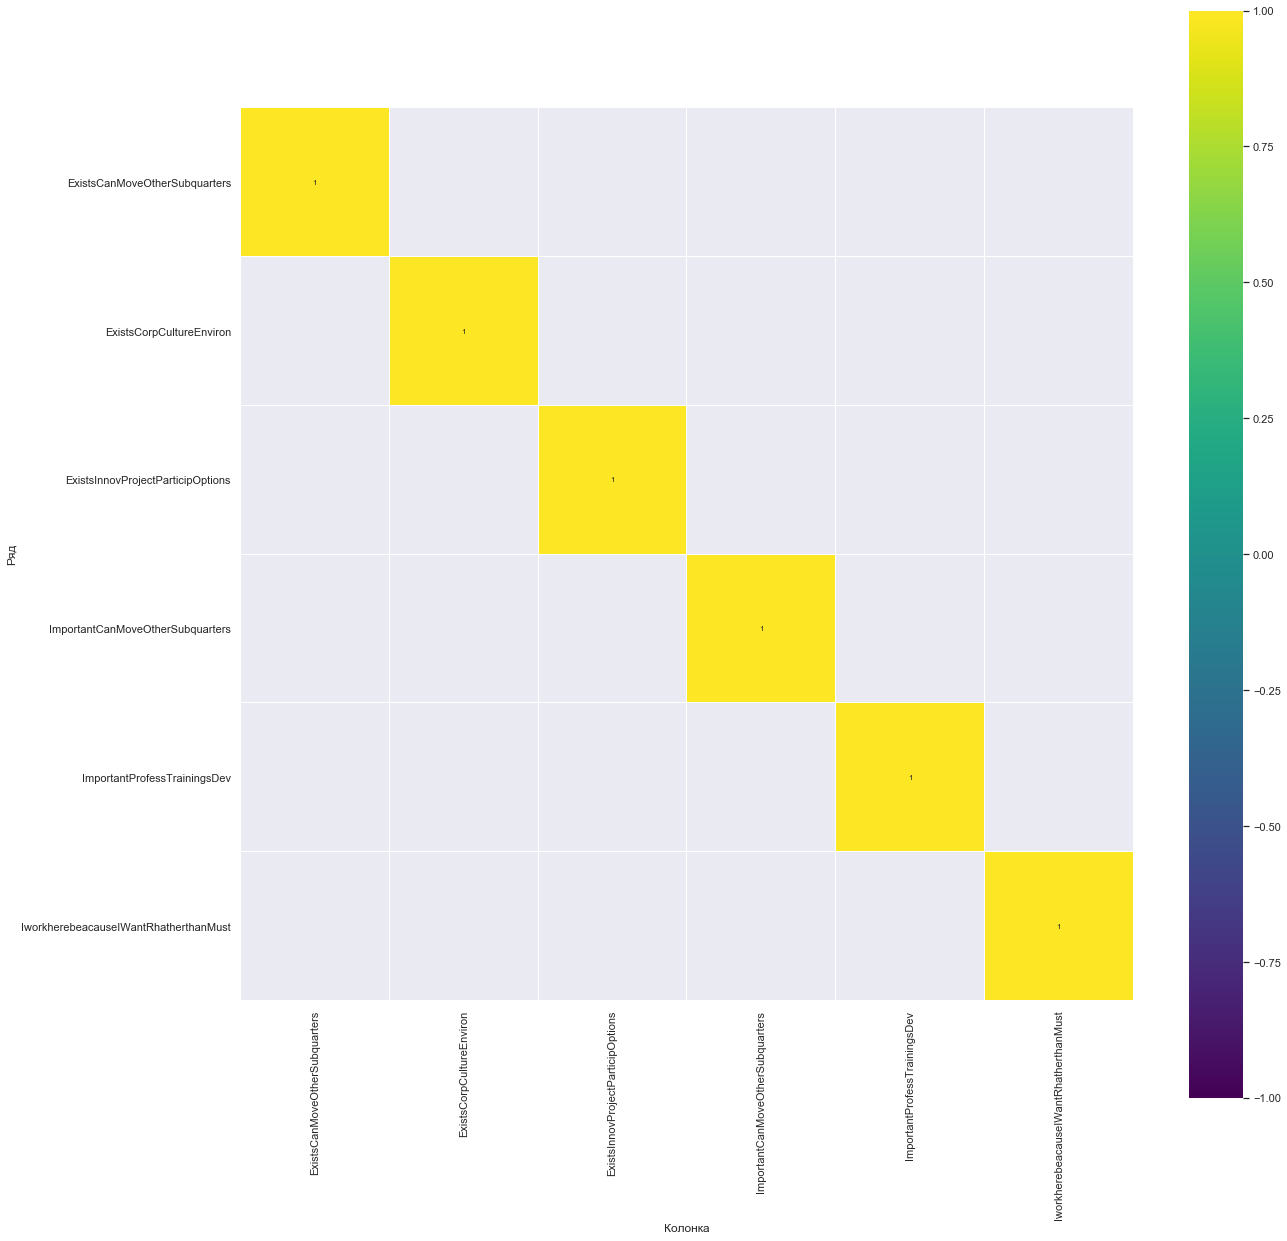

In [15]:
from sklearn.metrics import matthews_corrcoef

tab = pd.DataFrame()

for i in df[list(multi.index)]:
    for j in df[list(multi.index)]:
        tabb = df[[i,j]].dropna()
        N = matthews_corrcoef(tabb.iloc[:,0], tabb.iloc[:,1])
        Se_new = i
        Sp_new = j
        tab = tab.append({'Ряд': Se_new, 'Колонка': Sp_new, 'Коэфф. Мэтью' : N}, ignore_index=True)

tab = tab.pivot(index='Ряд', columns='Колонка', values='Коэфф. Мэтью')

sns.set(style = 'darkgrid')
plt.figure(figsize=(20, 20))
sns.heatmap(tab[(tab >= 0.3) | (tab <= -0.29)].round(2), cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size": 8}, square=True)
plt.show()

## RealityWorseThanExpectations_targ

In [16]:
reg_data = df.drop(columns=['RealityWorseThanExpectations_targ', 'RealityWorseThanExpectations', 
                            'RealityBetterThanExpectations_targ', 'RealityBetterThanExpectations', 'IAmPartOrganisation_targ', 
                            'ICanActualiseMyselfProfessionallyHere_targ', 'IworkherebeacauseIWantRhatherthanMust_targ']).dropna()
y = df.drop(columns=[]).dropna()[['RealityWorseThanExpectations_targ']]
logregr = pd.DataFrame()

for col in reg_data.columns:
    v = reg_data[col].name
    logit_model=sma.GLM(y, sma.add_constant(reg_data[[col]]), family = sma.families.Binomial())
    result=logit_model.fit()
    params = np.exp(result.params)[1]
    conf0 = np.exp(result.conf_int())[0][1]
    conf1 = np.exp(result.conf_int())[1][1]
    p = result.pvalues[1]
    logregr = logregr.append({'Names': v, 'OR': '{0:.2f}'.format(params), 'lower': '{0:.2f}'.format(conf0), 'upper': '{0:.2f}'.format(conf1),'p_val': p}, ignore_index=True)
            
logregr = logregr.reindex(columns=['Names', 'OR', 'lower', 'upper', 'p_val']) 
logregr = logregr[logregr['p_val'] < 0.05]
logregr

C:\Users\lizag\anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':
C:\Users\lizag\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]


,Names,OR,lower,upper,p_val
1,Gender,2.84,1.36,5.95,0.005640
4,Software Development,2.39,1.26,4.54,0.007876
5,QA & Testing,0.47,0.24,0.93,0.029142
6,Business & Functional Analysis,0.34,0.11,1.00,0.049270
12,ImportantTaskVariety,0.49,0.27,0.87,0.014584
13,ExistsTaskVariety,0.42,0.28,0.62,0.000015
15,ExistsProfExperiseIncrease,0.40,0.26,0.62,0.000034
17,ExistsCareerLadderPromot,0.50,0.34,0.72,0.000267
19,ExistsFullCycleDevInfluence,0.64,0.47,0.86,0.003562
21,ExistsModernTechnologyUse,0.65,0.47,0.89,0.008098


In [17]:
multi = regr_multi(df.dropna(), group = 'RealityWorseThanExpectations_targ', lst = list(logregr['Names']), save_tab = False)
multi = multi[multi['p_val'] < 0.05].drop(columns = 'Names').sort_values('OR', ascending = False)
multi

,OR,lower,upper,p_val
ExistsWorkStableReliableCompany,3.60,1.28,10.16,0.015
ICanActualiseMyselfProfessionallyHere,0.28,0.09,0.90,0.032
ExistsCanMoveOtherSubquarters,0.26,0.10,0.67,0.005
QA & Testing,0.09,0.01,0.64,0.017


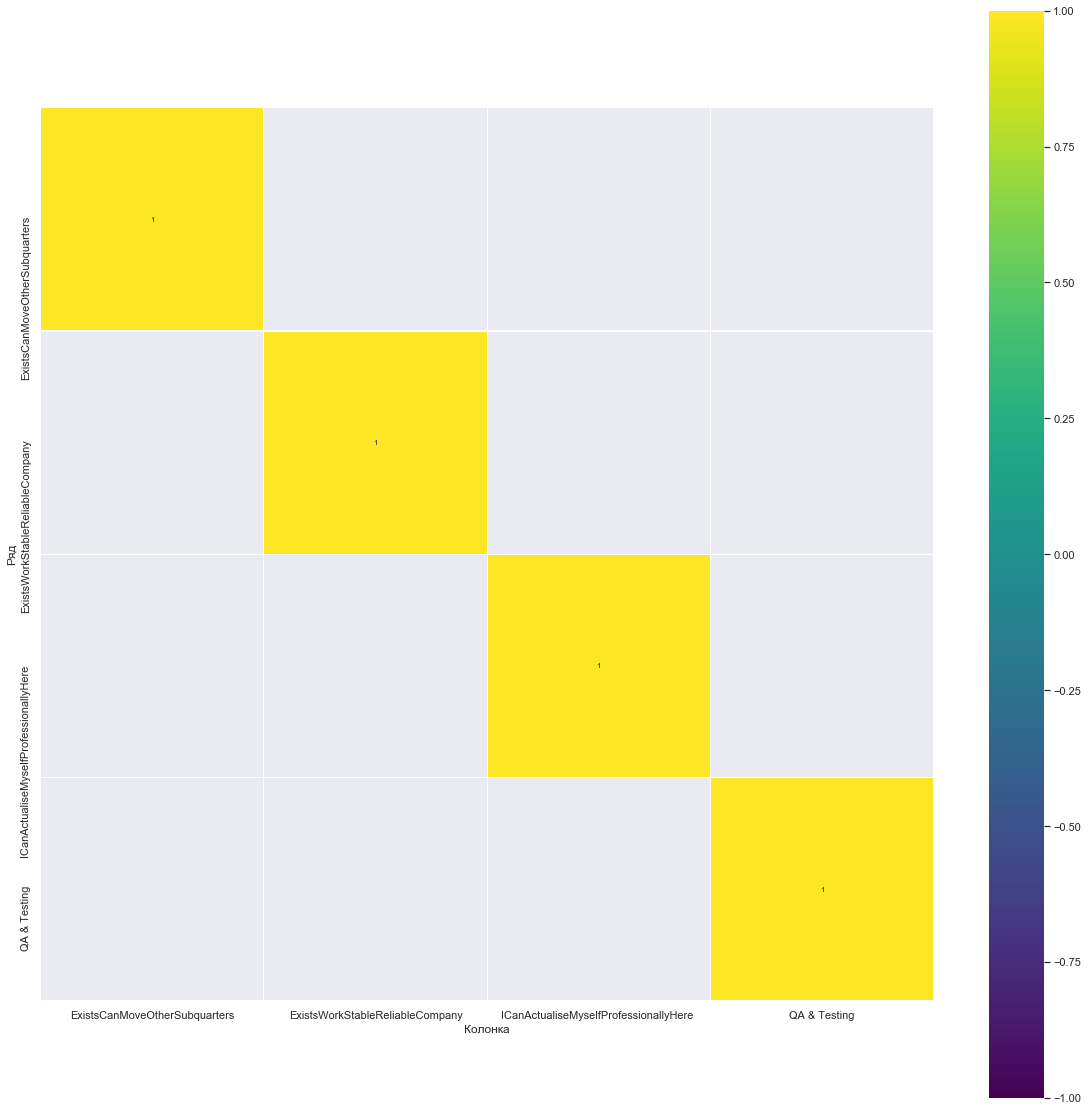

In [18]:
tab = pd.DataFrame()

for i in df[list(multi.index)]:
    for j in df[list(multi.index)]:
        tabb = df[[i,j]].dropna()
        N = matthews_corrcoef(tabb.iloc[:,0], tabb.iloc[:,1])
        Se_new = i
        Sp_new = j
        tab = tab.append({'Ряд': Se_new, 'Колонка': Sp_new, 'Коэфф. Мэтью' : N}, ignore_index=True)

tab = tab.pivot(index='Ряд', columns='Колонка', values='Коэфф. Мэтью')

sns.set(style = 'darkgrid')
plt.figure(figsize=(20, 20))
sns.heatmap(tab[(tab >= 0.3) | (tab <= -0.29)].round(2), cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size": 8}, square=True)
plt.show()

## IAmPartOrganisation_targ

In [19]:
reg_data = df.drop(columns=['IAmPartOrganisation_targ', 'IAmPartOrganisation', 'RealityBetterThanExpectations_targ',  
                            'RealityWorseThanExpectations_targ',  
                            'ICanActualiseMyselfProfessionallyHere_targ', 'IworkherebeacauseIWantRhatherthanMust_targ']).dropna()
y = df.drop(columns=[]).dropna()[['IAmPartOrganisation_targ']]
logregr = pd.DataFrame()

for col in reg_data.columns:
    v = reg_data[col].name
    logit_model=sma.GLM(y, sma.add_constant(reg_data[[col]]), family = sma.families.Binomial())
    result=logit_model.fit()
    params = np.exp(result.params)[1]
    conf0 = np.exp(result.conf_int())[0][1]
    conf1 = np.exp(result.conf_int())[1][1]
    p = result.pvalues[1]
    logregr = logregr.append({'Names': v, 'OR': '{0:.2f}'.format(params), 'lower': '{0:.2f}'.format(conf0), 'upper': '{0:.2f}'.format(conf1),'p_val': p}, ignore_index=True)
            
logregr = logregr.reindex(columns=['Names', 'OR', 'lower', 'upper', 'p_val']) 
logregr = logregr[logregr['p_val'] < 0.05]
logregr

C:\Users\lizag\anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':
C:\Users\lizag\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]


,Names,OR,lower,upper,p_val
13,ExistsTaskVariety,1.78,1.27,2.49,8.549454e-04
14,ImportantProfExperiseIncrease,2.74,1.19,6.27,1.743094e-02
15,ExistsProfExperiseIncrease,1.72,1.26,2.36,6.784297e-04
16,ImportantCareerLadderPromot,1.59,1.02,2.48,4.081066e-02
17,ExistsCareerLadderPromot,2.06,1.39,3.06,2.952252e-04
18,ImportantFullCycleDevInfluence,1.57,1.10,2.23,1.329983e-02
19,ExistsFullCycleDevInfluence,1.64,1.21,2.23,1.321056e-03
21,ExistsModernTechnologyUse,1.81,1.32,2.48,2.414648e-04
22,ImportantComplextProductServiceWork,1.53,1.05,2.22,2.528418e-02
33,ExistsOptionsProjectTeamChange,1.53,1.01,2.29,4.248432e-02


In [21]:
multi = regr_multi(df.dropna(), group = 'IAmPartOrganisation_targ', lst = list(logregr['Names']), save_tab = False)
multi = multi[multi['p_val'] < 0.05].drop(columns = 'Names').sort_values('OR', ascending = False)
multi 

,OR,lower,upper,p_val
IworkherebeacauseIWantRhatherthanMust,4.87,2.06,11.48,0.000
ICanActualiseMyselfProfessionallyHere,2.98,1.20,7.36,0.018
ExistsModernTechnologyUse,2.59,1.25,5.38,0.010
ImportantFullCycleDevInfluence,2.11,1.02,4.36,0.045
ExistsOpportinityToOfferAndRealIdeas,0.32,0.14,0.74,0.008


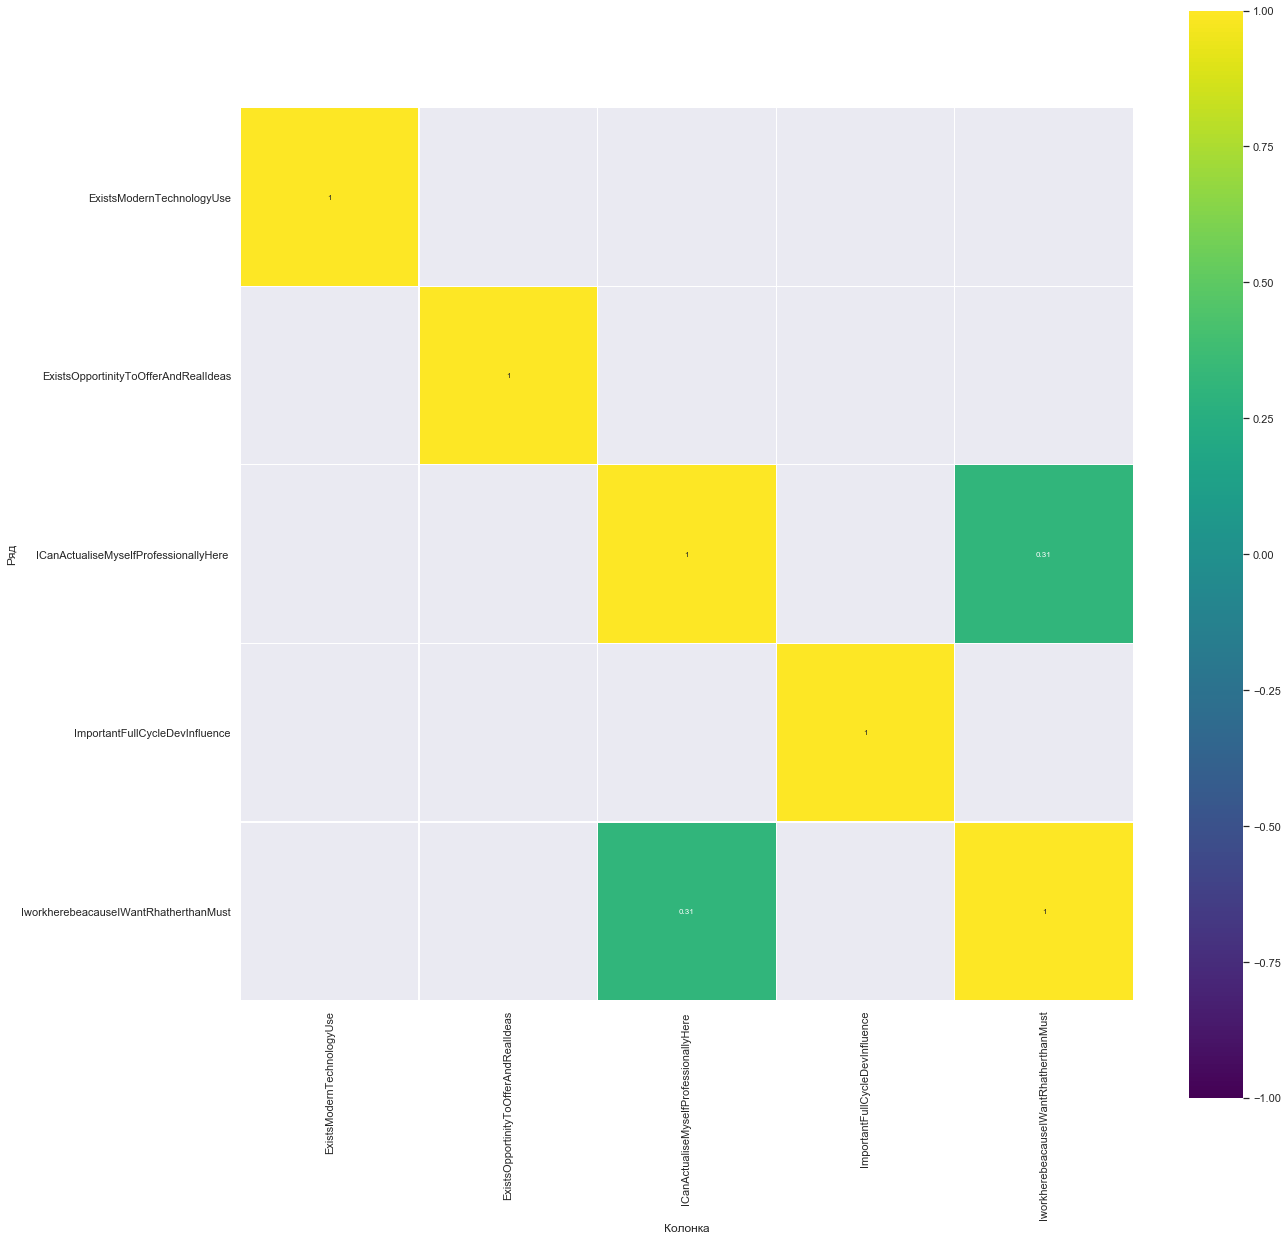

In [22]:
tab = pd.DataFrame()

for i in df[list(multi.index)]:
    for j in df[list(multi.index)]:
        tabb = df[[i,j]].dropna()
        N = matthews_corrcoef(tabb.iloc[:,0], tabb.iloc[:,1])
        Se_new = i
        Sp_new = j
        tab = tab.append({'Ряд': Se_new, 'Колонка': Sp_new, 'Коэфф. Мэтью' : N}, ignore_index=True)

tab = tab.pivot(index='Ряд', columns='Колонка', values='Коэфф. Мэтью')

sns.set(style = 'darkgrid')
plt.figure(figsize=(20, 20))
sns.heatmap(tab[(tab >= 0.3) | (tab <= -0.29)].round(2), cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size": 8}, square=True)
plt.show()

## ICanActualiseMyselfProfessionallyHere_targ

In [26]:
df.columns

Index(['City', 'Gender', 'Grade', 'RolesN', 'Software Development',
       'QA & Testing', 'Business & Functional Analysis', 'Infrastructure',
       'Project Management', 'Technology Manager',
       ...
       'RealityWorseThanExpectations', 'IAmPartOrganisation',
       'ICanActualiseMyselfProfessionallyHere ',
       'IworkherebeacauseIWantRhatherthanMust',
       'IllrecommendcompanyAsEmployer', 'RealityBetterThanExpectations_targ',
       'RealityWorseThanExpectations_targ', 'IAmPartOrganisation_targ',
       'ICanActualiseMyselfProfessionallyHere_targ',
       'IworkherebeacauseIWantRhatherthanMust_targ'],
      dtype='object', length=103)

In [27]:
reg_data = df.drop(columns=['ICanActualiseMyselfProfessionallyHere_targ', 'ICanActualiseMyselfProfessionallyHere ', 
                            'RealityBetterThanExpectations_targ',  'RealityWorseThanExpectations_targ', 
                            'IAmPartOrganisation_targ', 'IworkherebeacauseIWantRhatherthanMust_targ']).dropna()
y = df.drop(columns=[]).dropna()[['ICanActualiseMyselfProfessionallyHere_targ']]
logregr = pd.DataFrame()

for col in reg_data.columns:
    v = reg_data[col].name
    logit_model=sma.GLM(y, sma.add_constant(reg_data[[col]]), family = sma.families.Binomial())
    result=logit_model.fit()
    params = np.exp(result.params)[1]
    conf0 = np.exp(result.conf_int())[0][1]
    conf1 = np.exp(result.conf_int())[1][1]
    p = result.pvalues[1]
    logregr = logregr.append({'Names': v, 'OR': '{0:.2f}'.format(params), 'lower': '{0:.2f}'.format(conf0), 'upper': '{0:.2f}'.format(conf1),'p_val': p}, ignore_index=True)
            
logregr = logregr.reindex(columns=['Names', 'OR', 'lower', 'upper', 'p_val']) 
logregr = logregr[logregr['p_val'] < 0.05]
logregr

C:\Users\lizag\anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':
C:\Users\lizag\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]


,Names,OR,lower,upper,p_val
13,ExistsTaskVariety,2.39,1.65,3.47,4.669885e-06
15,ExistsProfExperiseIncrease,3.05,2.05,4.55,4.275188e-08
17,ExistsCareerLadderPromot,2.36,1.55,3.59,5.715682e-05
19,ExistsFullCycleDevInfluence,1.82,1.32,2.50,2.277887e-04
21,ExistsModernTechnologyUse,1.87,1.35,2.58,1.577543e-04
23,ExistsComplextProductServiceWork,2.15,1.44,3.21,1.712786e-04
29,ExistsProfessTrainingsDev,2.19,1.51,3.18,3.984279e-05
34,ImportantShareExperANDEducColleagues,1.49,1.02,2.17,3.790238e-02
35,ExistsShareExperANDEducColleagues,1.95,1.30,2.92,1.128091e-03
37,ExistsEnhaceManagerialCompetenceDecisionMakInf...,1.75,1.20,2.55,3.833034e-03


In [28]:
multi = regr_multi(df.dropna(), group = 'ICanActualiseMyselfProfessionallyHere_targ', lst = list(logregr['Names']), save_tab = False)
multi = multi[multi['p_val'] < 0.05].drop(columns = 'Names').sort_values('OR', ascending = False)
multi

,OR,lower,upper,p_val
IAmPartOrganisation,3.44,1.33,8.91,0.011
ExistsComplextProductServiceWork,2.50,1.11,5.65,0.027
ExistsCorpCultureEnviron,0.32,0.13,0.81,0.016


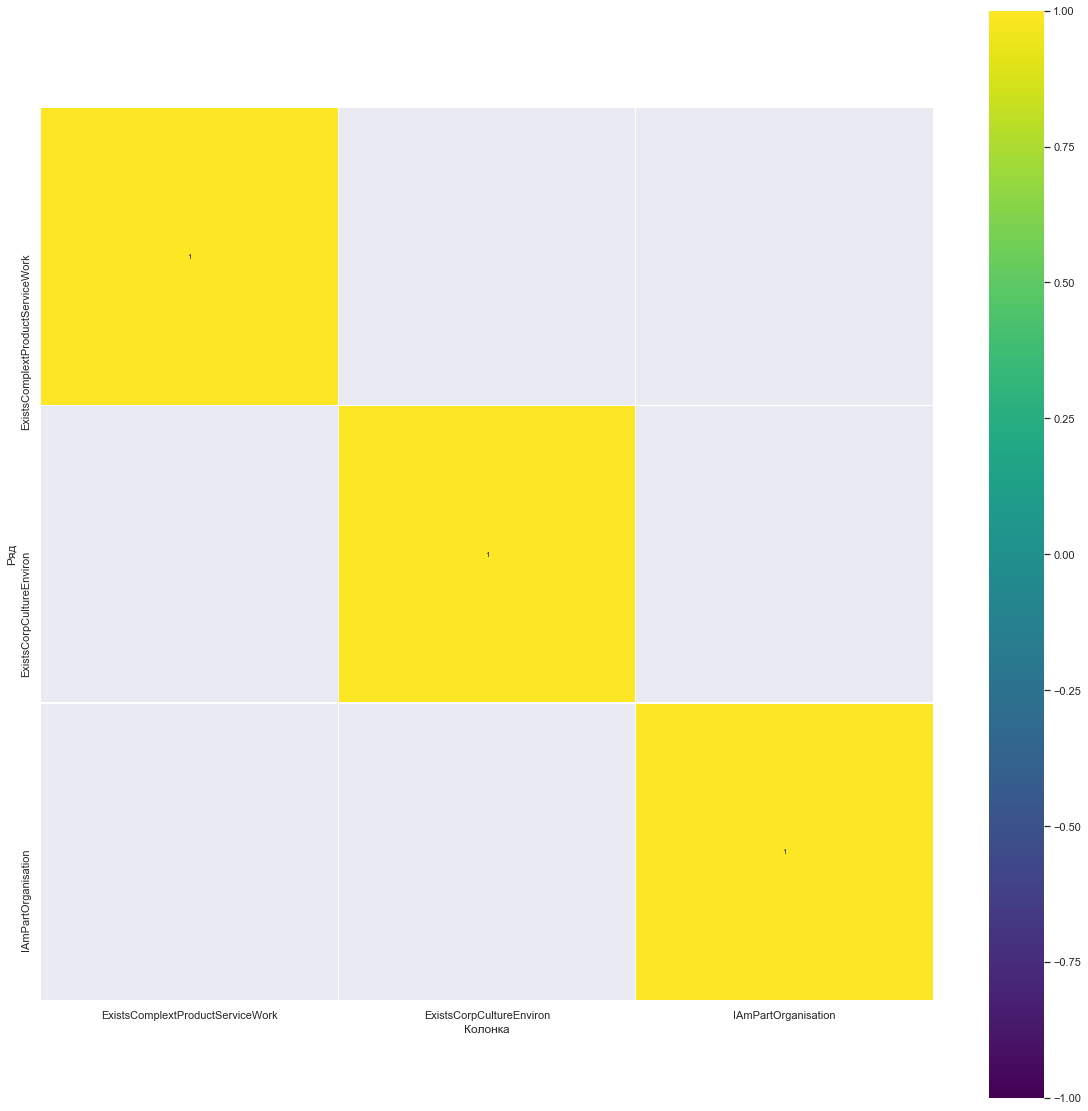

In [29]:
tab = pd.DataFrame()

for i in df[list(multi.index)]:
    for j in df[list(multi.index)]:
        tabb = df[[i,j]].dropna()
        N = matthews_corrcoef(tabb.iloc[:,0], tabb.iloc[:,1])
        Se_new = i
        Sp_new = j
        tab = tab.append({'Ряд': Se_new, 'Колонка': Sp_new, 'Коэфф. Мэтью' : N}, ignore_index=True)

tab = tab.pivot(index='Ряд', columns='Колонка', values='Коэфф. Мэтью')

sns.set(style = 'darkgrid')
plt.figure(figsize=(20, 20))
sns.heatmap(tab[(tab >= 0.3) | (tab <= -0.29)].round(2), cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size": 8}, square=True)
plt.show()

## IworkherebeacauseIWantRhatherthanMust_targ

In [137]:
reg_data = df.drop(columns=['IworkherebeacauseIWantRhatherthanMust_targ', 'IworkherebeacauseIWantRhatherthanMust',
                           'RealityBetterThanExpectations_targ', 'RealityWorseThanExpectations_targ', 'IAmPartOrganisation_targ', 
                            'ICanActualiseMyselfProfessionallyHere_targ']).dropna()
y = df.drop(columns=[]).dropna()[['IworkherebeacauseIWantRhatherthanMust_targ']]
logregr = pd.DataFrame()

for col in reg_data.columns:
    v = reg_data[col].name
    logit_model=sma.GLM(y, sma.add_constant(reg_data[[col]]), family = sma.families.Binomial())
    result=logit_model.fit()
    params = np.exp(result.params)[1]
    conf0 = np.exp(result.conf_int())[0][1]
    conf1 = np.exp(result.conf_int())[1][1]
    p = result.pvalues[1]
    logregr = logregr.append({'Names': v, 'OR': '{0:.2f}'.format(params), 'lower': '{0:.2f}'.format(conf0), 'upper': '{0:.2f}'.format(conf1),'p_val': p}, ignore_index=True)
            
logregr = logregr.reindex(columns=['Names', 'OR', 'lower', 'upper', 'p_val']) 
logregr = logregr[logregr['p_val'] < 0.05]
logregr

C:\Users\lizag\anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':
C:\Users\lizag\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]


,Names,OR,lower,upper,p_val
13,ExistsTaskVariety,1.67,1.19,2.34,2.850276e-03
15,ExistsProfExperiseIncrease,1.66,1.21,2.26,1.561360e-03
17,ExistsCareerLadderPromot,1.58,1.09,2.29,1.491557e-02
19,ExistsFullCycleDevInfluence,1.75,1.28,2.38,4.412461e-04
21,ExistsModernTechnologyUse,1.43,1.05,1.94,2.262324e-02
23,ExistsComplextProductServiceWork,1.84,1.25,2.70,1.835567e-03
28,ImportantProfessTrainingsDev,1.57,1.10,2.24,1.390217e-02
29,ExistsProfessTrainingsDev,1.42,1.01,2.01,4.418398e-02
33,ExistsOptionsProjectTeamChange,1.81,1.18,2.78,6.244098e-03
35,ExistsShareExperANDEducColleagues,1.78,1.20,2.63,4.031439e-03


In [138]:
multi = regr_multi(df.dropna(), group = 'IworkherebeacauseIWantRhatherthanMust_targ', lst = list(logregr['Names']), save_tab = False)
multi[multi['p_val'] < 0.05].drop(columns = 'Names').sort_values('OR', ascending = False)

,OR,lower,upper,p_val
IAmPartOrganisation,5.14,1.98,13.32,0.001
ExistsOpportinityToOfferAndRealIdeas,3.33,1.33,8.34,0.010


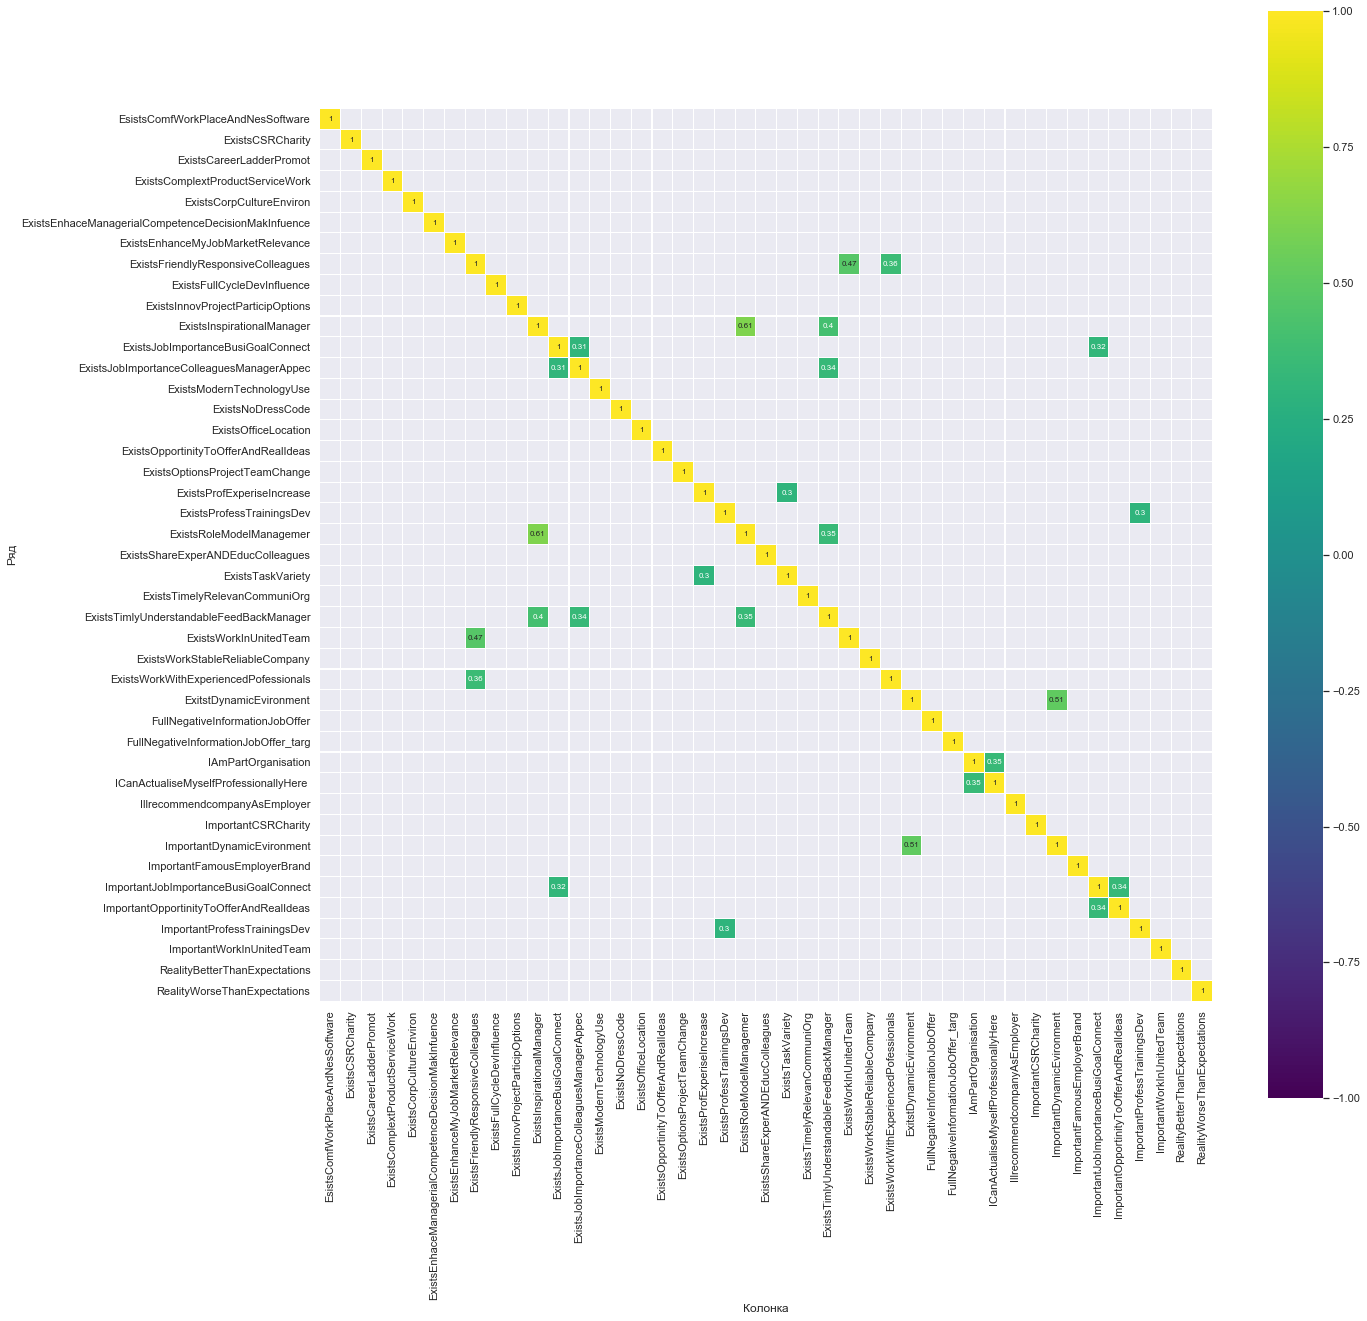

In [139]:
tab = pd.DataFrame()

for i in df[list(multi.index)]:
    for j in df[list(multi.index)]:
        tabb = df[[i,j]].dropna()
        N = matthews_corrcoef(tabb.iloc[:,0], tabb.iloc[:,1])
        Se_new = i
        Sp_new = j
        tab = tab.append({'Ряд': Se_new, 'Колонка': Sp_new, 'Коэфф. Мэтью' : N}, ignore_index=True)

tab = tab.pivot(index='Ряд', columns='Колонка', values='Коэфф. Мэтью')

sns.set(style = 'darkgrid')
plt.figure(figsize=(20, 20))
sns.heatmap(tab[(tab >= 0.3) | (tab <= -0.29)].round(2), cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size": 8}, square=True)
plt.show()

## Text analytics

https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk

*облако слов в питоне не получилось, делала его в Rstudio

In [144]:
!pip install nltk

In [1]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import codecs
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lizag\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lizag\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [149]:
file = "C:/Users/lizag/OneDrive/Рабочий стол/Управление талантами/Финальный проект/talents1.txt"

with codecs.open(file, 'r', encoding = 'utf8') as f:
        text1 = f.read()

In [150]:
tokenized_word = word_tokenize(text1.lower())

In [151]:
fdist0 = FreqDist(tokenized_word)
fdist0.most_common(50)

[('professional', 32),
 ('large-scale', 25),
 ('stable', 19),
 ('reliable', 17),
 ('bureaucracy', 16),
 ('team', 14),
 ('interesting', 14),
 ('perspective', 12),
 ('modern', 11),
 ('monetary', 9),
 ('big', 9),
 ('diverse', 8),
 ('developing', 7),
 ('technological', 7),
 ('intellectual', 6),
 ('enterprise', 6),
 ('global', 5),
 ('motivating', 5),
 ('energetic', 4),
 ('ambitious', 4),
 ('significant', 4),
 ('prestigious', 4),
 ('process', 4),
 ('smart', 4),
 ('challenge', 3),
 ('agile', 3),
 ('drive', 3),
 ('normal', 3),
 ('open', 3),
 ('proactive', 3),
 ('complicated', 3),
 ('business', 2),
 ('careful', 2),
 ('famous', 2),
 ('innovative', 2),
 ('comfortable', 2),
 ('responsible', 2),
 ('advanced', 2),
 ('fair', 2),
 ('approve', 1),
 ('beauty', 1),
 ('deadline', 1),
 ('open-space', 1),
 ('strangeness', 1),
 ('англоязычный', 1),
 ('баззворды', 1),
 ('бангалор', 1),
 ('ботаники', 1),
 ('возможность', 1),
 ('делать', 1)]

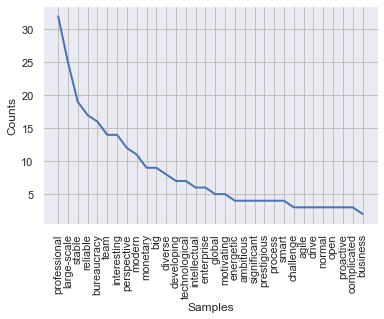

In [152]:
# Frequency Distribution Plot

fdist0.plot(32, cumulative=False)
plt.show()

In [3]:
file = "C:/Users/lizag/OneDrive/Рабочий стол/Управление талантами/Финальный проект/recomend.txt"

with codecs.open(file, 'r', encoding = 'utf8') as f:
        text2 = f.read()

In [6]:
tokenized_word1 = word_tokenize(text2.lower())

fdist1 = FreqDist(tokenized_word1)
fdist1.most_common(60)

[('monetary', 39),
 ('company', 28),
 ('team', 24),
 ('professional', 19),
 ('interesting', 17),
 ('work_conditions', 13),
 ('perspective', 12),
 ('stable', 11),
 ('developing', 10),
 ('technological', 7),
 ('complicated', 5),
 ('communicative', 5),
 ('work-life_balance', 2),
 ('reliable', 2),
 ('diverse', 2),
 ('famous', 2),
 ('modern', 2),
 ('young', 1),
 ('personal', 1),
 ('responsible', 1)]

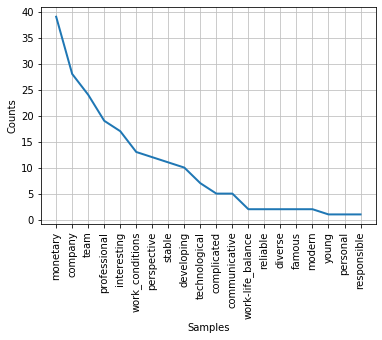

In [7]:
fdist1.plot(32, cumulative=False)
plt.show()